In [2]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
import logging

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset'][::2]
    test_labels = tmp_save['labels'][::2]
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (26149, 56, 56) (26149,)
Validation set (2000, 56, 56) (2000,)
Test set (6534, 56, 56) (6534,)


In [6]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (25314, 56, 56) (25314,)
Validation set (1935, 56, 56) (1935,)
Test set (6471, 56, 56) (6471,)


Labels [2 9]
Dtype float32
Shape (56, 56)
Color range -0.501638 0.5


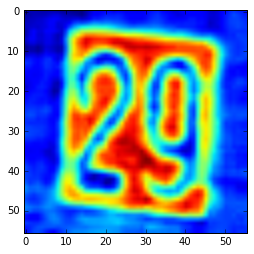

Labels [4]
Dtype float32
Shape (56, 56)
Color range -0.509558 0.5


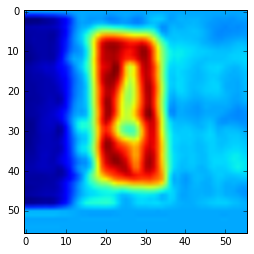

Labels [6 2]
Dtype float32
Shape (56, 56)
Color range -0.498231 0.5


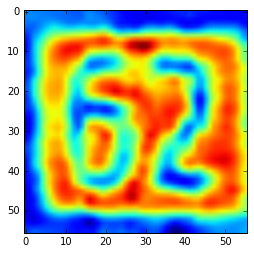

Labels [9 3]
Dtype float32
Shape (56, 56)
Color range -0.501597 0.5


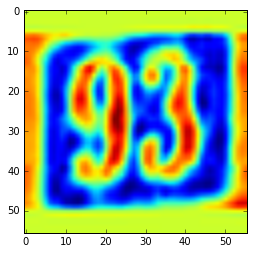

Labels [7 0]
Dtype float32
Shape (56, 56)
Color range -0.488698 0.5


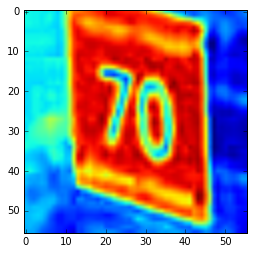

Labels [1 1 0]
Dtype float32
Shape (56, 56)
Color range -0.508595 0.5


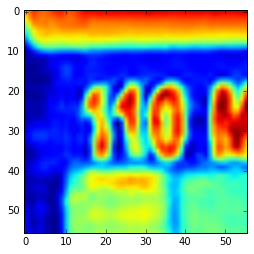

In [7]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [8]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (25314, 56, 56, 1) (25314, 3, 11)
Validation set (1935, 56, 56, 1) (1935, 3, 11)
Test set (6471, 56, 56, 1) (6471, 3, 11)


In [9]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (25314, 28, 28, 1) (25314, 3, 11)
Validation set (1935, 28, 28, 1) (1935, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


Labels [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.500989 0.474368


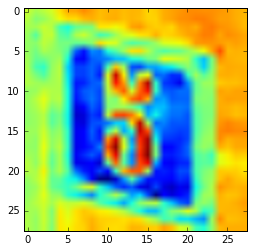

Labels [[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.439181 0.491976


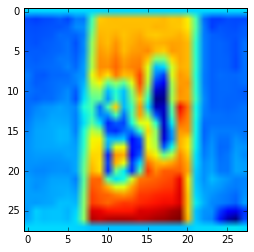

Labels [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.404326 0.442674


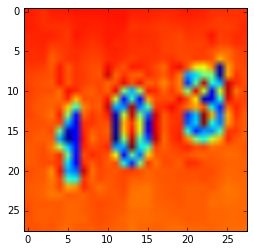

Labels [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.487969 0.469762


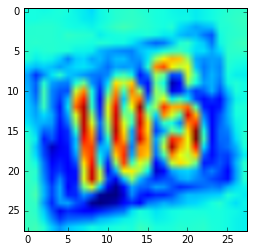

Labels [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.501368 0.46399


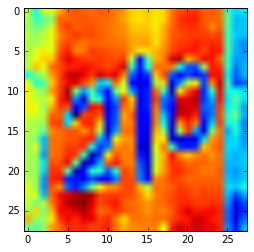

Labels [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
Dtype float32
Shape (28, 28, 1)
Color range -0.497155 0.365388


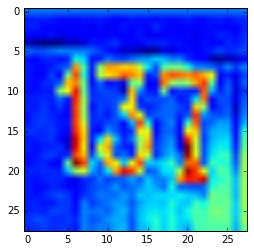

In [14]:
for dataset, labels in [(train_dataset_28, train_labels),
                        (valid_dataset_28, valid_labels),
                        (test_dataset_28, test_labels)]:
    show_images(dataset, labels, 2)

In [10]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [11]:
train_dataset, valid_dataset, test_dataset = dataset_56

def run(graph_config):
    #graph_config.update({'layers':[8, 16, 32], 'use_max_pool':False,  'use_dropout':True})
    print(graph_config)
    batch_size=64
    graph = create_graph(batch_size, num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, batch_size, num_digits, train_dataset, train_labels, valid_labels, test_labels,
              mins=5, save_model=True)
    return graph

In [16]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[8]})

{'layers': [8], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):8/1800 (0.00%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.451435
Minibatch accuracy: 64.6%
Validation accuracy: 49.0%
Elapsed time(s):17/1800 (0.01%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.152939
Minibatch accuracy: 77.1%
Validation accuracy: 63.5%
Elapsed time(s):26/1800 (0.01%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.813697
Minibatch accuracy: 83.3%
Validation accuracy: 68.2%
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.929273
Minibatch accuracy: 79.2%
Validation accuracy: 70.2%
Elapsed time(s):44/1800 (0.02%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.695889
Minibatch accuracy: 93.8%
Validation accuracy: 72.1%
Elapsed time(s):53/1800 (0.03%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.659547
Minibatch accuracy: 89.6%
Validation accuracy: 73.7%
El

In [17]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[8, 16]})

{'layers': [8, 16], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):13/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.231024
Minibatch accuracy: 79.2%
Validation accuracy: 56.5%
Elapsed time(s):27/1800 (0.02%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.961275
Minibatch accuracy: 87.5%
Validation accuracy: 69.4%
Elapsed time(s):41/1800 (0.02%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.649188
Minibatch accuracy: 89.6%
Validation accuracy: 73.7%
Elapsed time(s):55/1800 (0.03%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.999847
Minibatch accuracy: 83.3%
Validation accuracy: 75.8%
Elapsed time(s):69/1800 (0.04%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.722383
Minibatch accuracy: 93.8%
Validation accuracy: 78.7%
Elapsed time(s):83/1800 (0.05%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.482889
Minibatch accuracy: 93.8%
Validation accuracy: 79.

In [18]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[8, 16, 32]})

{'layers': [8, 16, 32], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):16/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.206542
Minibatch accuracy: 77.1%
Validation accuracy: 55.9%
Elapsed time(s):34/1800 (0.02%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.945143
Minibatch accuracy: 85.4%
Validation accuracy: 68.5%
Elapsed time(s):52/1800 (0.03%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.776144
Minibatch accuracy: 85.4%
Validation accuracy: 74.9%
Elapsed time(s):69/1800 (0.04%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.812568
Minibatch accuracy: 85.4%
Validation accuracy: 76.0%
Elapsed time(s):87/1800 (0.05%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.440728
Minibatch accuracy: 97.9%
Validation accuracy: 78.4%
Elapsed time(s):105/1800 (0.06%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.702605
Minibatch accuracy: 93.8%
Validation accuracy

In [19]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[8, 8]})

{'layers': [8, 8], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):12/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.284091
Minibatch accuracy: 72.9%
Validation accuracy: 54.5%
Elapsed time(s):26/1800 (0.01%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.069365
Minibatch accuracy: 79.2%
Validation accuracy: 67.7%
Elapsed time(s):40/1800 (0.02%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.803590
Minibatch accuracy: 85.4%
Validation accuracy: 73.7%
Elapsed time(s):54/1800 (0.03%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.952868
Minibatch accuracy: 79.2%
Validation accuracy: 75.8%
Elapsed time(s):67/1800 (0.04%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.430150
Minibatch accuracy: 100.0%
Validation accuracy: 76.6%
Elapsed time(s):81/1800 (0.05%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.668444
Minibatch accuracy: 89.6%
Validation accuracy: 78.

In [20]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[8, 8, 8]})

{'layers': [8, 8, 8], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):14/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.642881
Minibatch accuracy: 47.9%
Validation accuracy: 45.2%
Elapsed time(s):29/1800 (0.02%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.303251
Minibatch accuracy: 66.7%
Validation accuracy: 60.8%
Elapsed time(s):44/1800 (0.02%)
Learning rate: 0.123074
Minibatch loss at step 3000: 1.100474
Minibatch accuracy: 81.2%
Validation accuracy: 66.1%
Elapsed time(s):59/1800 (0.03%)
Learning rate: 0.122438
Minibatch loss at step 4000: 1.004924
Minibatch accuracy: 79.2%
Validation accuracy: 70.3%
Elapsed time(s):74/1800 (0.04%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.713685
Minibatch accuracy: 87.5%
Validation accuracy: 72.6%
Elapsed time(s):89/1800 (0.05%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.871446
Minibatch accuracy: 85.4%
Validation accuracy: 7

In [21]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[16, 16]})

{'layers': [16, 16], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):18/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.153668
Minibatch accuracy: 77.1%
Validation accuracy: 60.9%
Elapsed time(s):37/1800 (0.02%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.969745
Minibatch accuracy: 79.2%
Validation accuracy: 70.6%
Elapsed time(s):57/1800 (0.03%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.842319
Minibatch accuracy: 89.6%
Validation accuracy: 74.0%
Elapsed time(s):76/1800 (0.04%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.909850
Minibatch accuracy: 77.1%
Validation accuracy: 78.0%
Elapsed time(s):96/1800 (0.05%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.472334
Minibatch accuracy: 93.8%
Validation accuracy: 79.8%
Elapsed time(s):116/1800 (0.06%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.384619
Minibatch accuracy: 97.9%
Validation accuracy: 8

In [22]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[16, 32]})

{'layers': [16, 32], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):21/1800 (0.01%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.006785
Minibatch accuracy: 89.6%
Validation accuracy: 63.4%
Elapsed time(s):44/1800 (0.02%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.962998
Minibatch accuracy: 89.6%
Validation accuracy: 70.5%
Elapsed time(s):67/1800 (0.04%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.740485
Minibatch accuracy: 89.6%
Validation accuracy: 76.9%
Elapsed time(s):90/1800 (0.05%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.952920
Minibatch accuracy: 87.5%
Validation accuracy: 79.0%
Elapsed time(s):114/1800 (0.06%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.462101
Minibatch accuracy: 100.0%
Validation accuracy: 81.6%
Elapsed time(s):137/1800 (0.08%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.530792
Minibatch accuracy: 91.7%
Validation accuracy:

In [23]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125,
             'layers':[16, 32, 64]})

{'layers': [16, 32, 64], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125}
Batch_size:16
Mins:30
Initialized
Elapsed time(s):33/1800 (0.02%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.184330
Minibatch accuracy: 83.3%
Validation accuracy: 63.5%
Elapsed time(s):66/1800 (0.04%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.811295
Minibatch accuracy: 87.5%
Validation accuracy: 71.0%
Elapsed time(s):100/1800 (0.06%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.772652
Minibatch accuracy: 93.8%
Validation accuracy: 76.7%
Elapsed time(s):133/1800 (0.07%)
Learning rate: 0.122438
Minibatch loss at step 4000: 0.884701
Minibatch accuracy: 89.6%
Validation accuracy: 79.4%
Elapsed time(s):166/1800 (0.09%)
Learning rate: 0.121806
Minibatch loss at step 5000: 0.484537
Minibatch accuracy: 100.0%
Validation accuracy: 80.4%
Elapsed time(s):201/1800 (0.11%)
Learning rate: 0.121178
Minibatch loss at step 6000: 0.541994
Minibatch accuracy: 95.8%
Validation acc

KeyboardInterrupt: 

In [33]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.05,
             'layers':[16, 32, 64]})

{'layers': [16, 32, 64], 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.05}
Batch_size:64
Mins:30
Initialized
Elapsed time(s):55/1800 (0.03%)
Learning rate: 0.0498705
Minibatch loss at step 500: 2.892712
Minibatch accuracy: 73.4%
Validation accuracy: 67.4%
Elapsed time(s):115/1800 (0.06%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.779226
Minibatch accuracy: 90.6%
Validation accuracy: 77.7%
Elapsed time(s):175/1800 (0.10%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.517892
Minibatch accuracy: 91.1%
Validation accuracy: 80.8%
Elapsed time(s):236/1800 (0.13%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.243874
Minibatch accuracy: 94.8%
Validation accuracy: 82.6%
Elapsed time(s):300/1800 (0.17%)
Learning rate: 0.049357
Minibatch loss at step 2500: 0.718368
Minibatch accuracy: 98.4%
Validation accuracy: 83.5%


KeyboardInterrupt: 

In [39]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.05,
             'learning_decay':0.95,
             'layers':[16, 32, 64]})

{'layers': [16, 32, 64], 'use_dropout': True, 'use_max_pool': True, 'learning_decay': 0.95, 'learning_rate': 0.05}
Batch_size:64
Mins:5
Initialized
Elapsed time(s):58/300 (0.20%)
Learning rate: 0.0499872
Minibatch loss at step 500: 2.805459
Minibatch accuracy: 78.1%
Validation accuracy: 68.2%
Elapsed time(s):126/300 (0.42%)
Learning rate: 0.0499743
Minibatch loss at step 1000: 2.182050
Minibatch accuracy: 81.8%
Validation accuracy: 77.2%
Elapsed time(s):189/300 (0.63%)
Learning rate: 0.0499615
Minibatch loss at step 1500: 1.871330
Minibatch accuracy: 87.5%
Validation accuracy: 79.6%
Elapsed time(s):254/300 (0.85%)
Learning rate: 0.0499487
Minibatch loss at step 2000: 1.292051
Minibatch accuracy: 93.8%
Validation accuracy: 82.7%
Elapsed time(s):300/300 (1.00%)

TIMEUP!
Learning rate: 0.04994
Minibatch loss at step 2339: 1.148168
Minibatch accuracy: 94.3%
Validation accuracy: 83.3%
Test accuracy: 83.4%
Saving graph
Finished


In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.05,
             'learning_decay':0.95,
             'layers':[16, 32, 64]})

{'layers': [16, 32, 64], 'use_dropout': True, 'use_max_pool': True, 'learning_decay': 0.95, 'learning_rate': 0.05}
Batch_size:64
Mins:5
Initialized
Elapsed time(s):278/300 (0.93%)
Learning rate: 0.0499872
Minibatch loss at step 500: 2.703000
Minibatch accuracy: 78.1%
Validation accuracy: 67.0%
Elapsed time(s):300/300 (1.00%)

TIMEUP!
Learning rate: 0.0499871
Minibatch loss at step 504: 3.166523
Minibatch accuracy: 76.0%
Validation accuracy: 66.8%